In [1]:
#Import libarary

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from scipy.cluster.hierarchy import linkage 

In [2]:
#read file
crime_data = pd.read_csv('~/Downloads/Data Science/data set/crime_data.csv') 

In [3]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
# Drop the Unnamed: 0column from the data 
X = crime_data.drop('Unnamed: 0', axis = 1) 

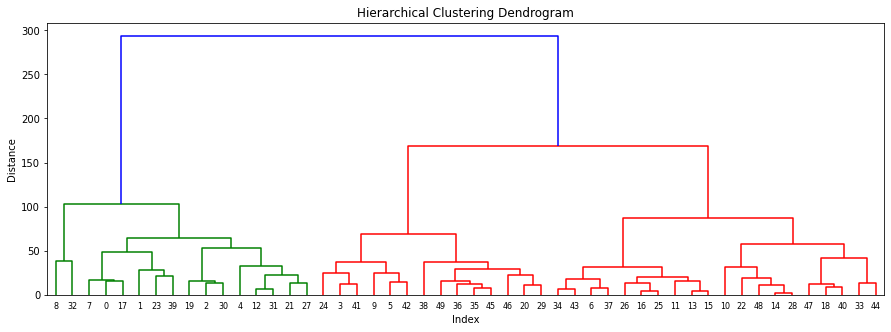

In [5]:
z = linkage(X, method="complete",metric="euclidean")

plt.figure(figsize=(15, 5));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
shc.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [6]:
#build model using 3 cluster
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(X) 

In [7]:
#view cluster assigned number
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0     0
1     0
2     0
3     2
4     0
5     2
6     1
7     0
8     0
9     2
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    0
18    1
19    0
20    2
21    0
22    1
23    0
24    2
25    1
26    1
27    0
28    1
29    2
30    0
31    0
32    0
33    1
34    1
35    2
36    2
37    1
38    2
39    0
40    1
41    2
42    2
43    1
44    1
45    2
46    2
47    1
48    1
49    2
dtype: int64

In [8]:
# getting aggregate mean of each cluster
crime_data.iloc[:,].groupby(cluster_labels).median()

,Murder,Assault,UrbanPop,Rape
0,11.75,261.0,71.0,26.95
1,3.55,94.0,59.5,14.55
2,7.65,167.5,69.0,23.10
